<a href="https://colab.research.google.com/github/LekhanaCh/Netflix/blob/main/Netflix_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Netflix - Data Exploration and Visualisation**


# **Defining Problem Statement and Analyzing basic metrics**


Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.



# Importing the libraries we require and loading the dataset:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_df = pd.read_csv("netflix.csv")

In [ ]:
netflix_df.ndim

2

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Above are the first 5 rows of the dataset. After a quick view at the data frame, we get to know that it contains few Nan values, and few columns have multiple values we have to unnest data  

# **Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category', missing value detection, statistical summary**

In [ ]:
netflix_df.shape

(8807, 12)

The dataset contains 8807 rows and 12 columns.

In [ ]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

A total of 8807 Movies/TV shows data is provided in the dataset with show_id and title columns having unique values.



In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


director, cast, country, date_added, rating, duration are the columns which have null values.

In [ ]:
print(netflix_df[netflix_df.duplicated()])

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


No duplicate records are found.

## Statistical summary before data cleaning:

In [ ]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Only single column i.e., release_year has numerical values all the remaining columns are having categorical data.

In [ ]:
netflix_df.describe(include = object) #to check statistical summary of categorical type data

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## Missing Value Detection and Data Cleaning/ Pre-processing
Imputation is a treatment method for missing value by modifying, replacing, or deleting using certain techniques. Here based on the missing values, we're filling as 'Not available'





In [ ]:
print('\nColumns with missing value:')
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [ ]:
netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We have 2634 missing points under "director", 825 under "cast", 831 under "country", 10 under "date_added", 4 under "rating" and
3 under “duration”. We will have to handle all null data points before we can dive into EDA and
modelling.

Removing rows which contain null values in the date_added column and converting to date and time format

In [ ]:
netflix_df["date_added"].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [ ]:
netflix_df.drop(netflix_df.loc[netflix_df['date_added'].isna()].index , axis = 0 , inplace = True)

netflix_df['date_added'] = netflix_df['date_added'].str.strip() # removing any leading and trailing spaces
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [ ]:
netflix_df["date_added"].value_counts()

date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2017-02-21      1
2017-02-07      1
2017-01-29      1
2017-01-25      1
2020-01-11      1
Name: count, Length: 1714, dtype: int64

In [ ]:
netflix_df["rating"].value_counts() #checking unique values in rating columns.

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

We can see that the above 74 min, 84 min, 66 min are inappropriate rating values which might be misplaced, we'll replace them with Nan.

In [ ]:
netflix_df[netflix_df['duration'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Shifting rating values to duration

In [ ]:
ind = netflix_df[netflix_df['duration'].isna()].index
netflix_df.loc[ind] = netflix_df.loc[ind].fillna(method = 'ffill' , axis = 1)
netflix_df.loc[ind ,'rating'] = 'Not Available' # replacing wrong entries rating with 'Not Available'
netflix_df.loc[ind]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


After shifting values to duration, there are no null values in the column.
Other director, cast, country and rating columns have null values we're replacing with 'Not Available'

In [ ]:
netflix_df.director.fillna("Not Available", inplace=True)
netflix_df.cast.fillna("Not Available", inplace=True)
netflix_df.country.fillna("Not Available", inplace=True)
netflix_df.rating.fillna("Not Available", inplace=True)


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   object        
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 1.1+ MB


## Unnesting data

In [ ]:
netflix_df["cast"].value_counts()

cast
Not Available                                                                                                                                    825
David Attenborough                                                                                                                                19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                           14
Samuel West                                                                                                                                       10
Jeff Dunham                                                                                                                                        7
                                                                                                                                                ... 
Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, S

In [ ]:
netflix_df["director"].value_counts()

director
Not Available                     2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [ ]:
netflix_df["country"].value_counts()

country
United States                             2812
India                                      972
Not Available                              830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [ ]:
netflix_df["listed_in"].value_counts()

listed_in
Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: count, Length: 513, dtype: int64

The columns cast, director, country, listed_in have multiple comma seperated values in a single row. This makes it difficult to analyse. We can use explode function in Pandas to split them into different rows.

We are Creating a separate dataframe to avoid the duplicasy of records in our origional dataframe after exploding.

In [ ]:
df1 = netflix_df

df1["director"] = netflix_df["director"].str.split(", ")
df1["cast"] = netflix_df["cast"].str.split(", ")
df1["country"] = netflix_df["country"].str.split(", ")
df1["listed_in"] = netflix_df["listed_in"].str.split(", ")

df1 = df1.explode(['director'])
df1 = df1.explode(['cast'])
df1 = df1.explode(['country'])
df1 = df1.explode(['listed_in'])

df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Not Available,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Not Available,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#checking shape of new df
df1.shape

(201833, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201833 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201833 non-null  object        
 1   type          201833 non-null  object        
 2   title         201833 non-null  object        
 3   director      201833 non-null  object        
 4   cast          201833 non-null  object        
 5   country       201833 non-null  object        
 6   date_added    201833 non-null  datetime64[ns]
 7   release_year  201833 non-null  object        
 8   rating        201833 non-null  object        
 9   duration      201833 non-null  object        
 10  listed_in     201833 non-null  object        
 11  description   201833 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 20.0+ MB


# **3. Non-Graphical Analysis: Value counts and unique**



In [ ]:
df1['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

There are two types of content in Netflix one being TV Shows and other is Movies

## Total number of TV Shows and Movies:

In [ ]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

There are 6131 Movies in total and 2666 TV Shows

208 Directors

## Top 5 directors who have appeared the most in TV Shows or Movies:

In [ ]:
df1['director'].value_counts().nunique()

208

In [ ]:
df_director = df1[df1['director']!= 'Not Available']

df_director.groupby('director')['title'].nunique().sort_values(ascending  = False)

director
Rajiv Chilaka              22
Jan Suter                  21
Raúl Campos                19
Suhas Kadav                16
Marcus Raboy               16
                           ..
Jovanka Vuckovic            1
Bradley Walsh               1
Juan Antin                  1
Juan Antonio de la Riva     1
Ayumu Watanabe              1
Name: title, Length: 4993, dtype: int64

Insights:

Rajiv Chilaka, Jan Suter, Raúl Campos, Suhas Kadav, Marcus Raboy are the top 5 directors whose content is most available

## Top 5 actors who have appeared the most in TV Shows or Movies:


In [ ]:
df1['cast'].value_counts().nunique()

95

In [ ]:
df_cast = df1[df1['cast']!= 'Not Available']

df_cast.groupby('cast')['title'].nunique().sort_values(ascending  = False)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
                    ..
Jamie Lee            1
Jamie Kenna          1
Jamie Kaler          1
Jamie Johnston       1
Ṣọpẹ́ Dìrísù         1
Name: title, Length: 36403, dtype: int64

Insights:

Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, Takahiro Sakurai are the top 5 actors

## Top 10 Countries which have produced the most Movies and most TV Shows on Netflix.


In [ ]:
df_movie = df1[df1['country']!= 'Not Available']
df_movie=df_movie.groupby('country')['title'].nunique().sort_values(ascending  = False).head(10)

df_movie

country
United States     3683
India             1046
United Kingdom     803
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: title, dtype: int64

## First movie/tv show added on netflix and the most recent as per given data

In [ ]:
timeperiod = pd.Series((df1['date_added'].min() , df1['date_added'].max()))
timeperiod.index = ['First' , 'Most Recent']
timeperiod

First         2008-01-01
Most Recent   2021-09-25
dtype: datetime64[ns]

First TV show/Movie was added to Netflix in the year 2008 and the recent one was in 2021

## Different ratings available on Netflix in each type of content. Checking the number of content released in each type.

First TV show/Movie was added to Netflix in the year 2008 and the recent one was in 2021

In [ ]:
df1.groupby(['type','rating']).agg({"title":"nunique"}).sort_values(by=['type','title'], ascending=False)


title
type    rating              
TV Show TV-MA           1143
        TV-14            730
        TV-PG            321
        TV-Y7            194
        TV-Y             175
        TV-G              94
        NR                 4
        Not Available      2
        R                  2
        TV-Y7-FV           1
Movie   TV-MA           2062
        TV-14           1427
        R                797
        TV-PG            540
        PG-13            490
        PG               287
        TV-Y7            139
        TV-Y             131
        TV-G             126
        NR                75
        G                 41
        Not Available      5
        TV-Y7-FV           5
        NC-17              3
        UR                 3

TV-MA and TV-14 are the two ratings which majority of the Movies/TV Shows had.

## Movies and TV shows have different format for duration

In [ ]:
movies  = netflix_df.loc[netflix_df['type'] == 'Movie']
tv_shows = netflix_df.loc[netflix_df['type'] == 'TV Show']
movies.duration.value_counts()

duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64

Majority of the movies have duration around 90-100 mins

In [ ]:
tv_shows.duration.value_counts()

duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

Majority of the TV Shows have duration around just 1 Season

## Top 5 Genres
'listed_in' is the column to understand more about genres

In [ ]:
df_genre=df1.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(5).reset_index()
df_genre

,index,listed_in,title
0,16,International Movies,2752
1,12,Dramas,2427
2,7,Comedies,1674
3,17,International TV Shows,1350
4,10,Documentaries,869


International Movies, Dramas, Comedies are the Genres that are widely added to Netflix

# **Visual Analysis - Univariate, Bivariate after pre-processing of the data**

**Precentage of Movies and TV Shows**

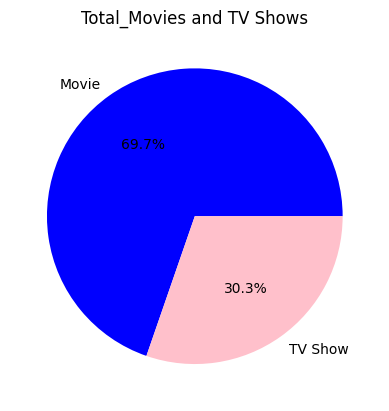

In [ ]:
types=df1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(types['title'],  labels=types['type'], autopct='%1.1f%%' , colors = ['blue' , 'pink'])
plt.title('Total_Movies and TV Shows')
plt.show()

We can observe that around 70% content is Movies and around 30% content is TV shows. So, many movies are being released by Netflix than tv shows

**Distribution of 'date_added' column. Displaying how the number of movies/TV shows added on Netflix per year changed over the time**

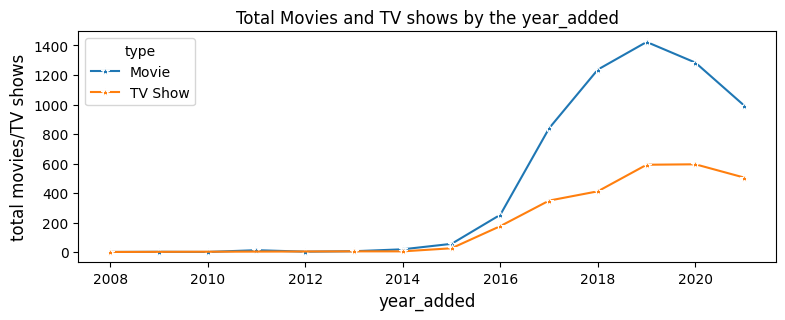

In [ ]:
df_time=netflix_df
df_time['year_added'] = netflix_df['date_added'].dt.year

d = df_time.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

plt.figure(figsize = (9,3))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = '*'  , ms = 6)
plt.xlabel('year_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('Total Movies and TV shows by the year_added' , fontsize = 12)
plt.show()


Observation:
* The year 2019 marks the highest number of movies and TV shows added on the Netflix.
* The content added on the Netflix increased drastically after 2015.
* Since then there has been a drop in Movies added on Netflix, probably because of pandemic. But still , TV shows content have not dropped as drastic as movies.
* Overall, Movies are being added more than TV Shows.

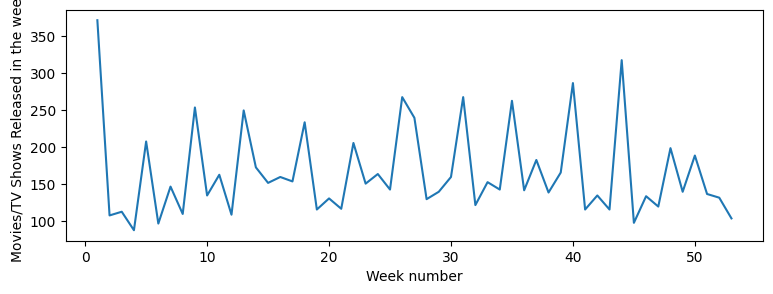

In [ ]:
df_time['week_added'] = netflix_df['date_added'].dt.isocalendar().week # extracting year from date and adding a new column

df_week=df_time.groupby(['week_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(9,3))
sns.lineplot(data=df_week, x='week_added', y='title')
plt.ylabel("Movies/TV Shows Released in the week")
plt.xlabel("Week number")
plt.show()

Insight:

* In the beginning of the year, many TV Shows/Movies are being added

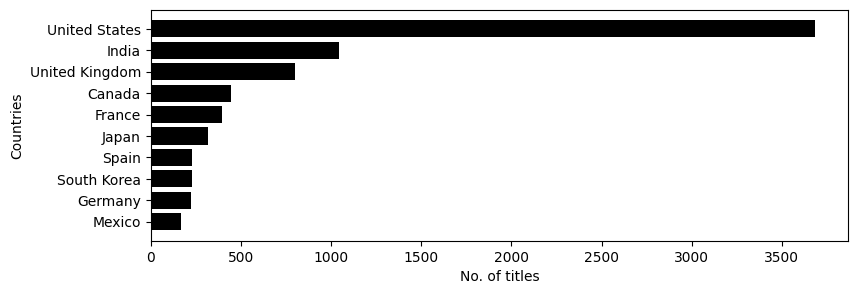

In [ ]:
df_country=df1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)
df_country=df_country[df_country['country']!='Not Available']
df_country=df_country.head(10)
plt.figure(figsize=(9,3))

plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['black'])
plt.xlabel('No. of titles')
plt.ylabel('Countries')
plt.show()

United States, India, United Kingdom, Canada, France are the 5 top countries that are contributing to Netflix's content

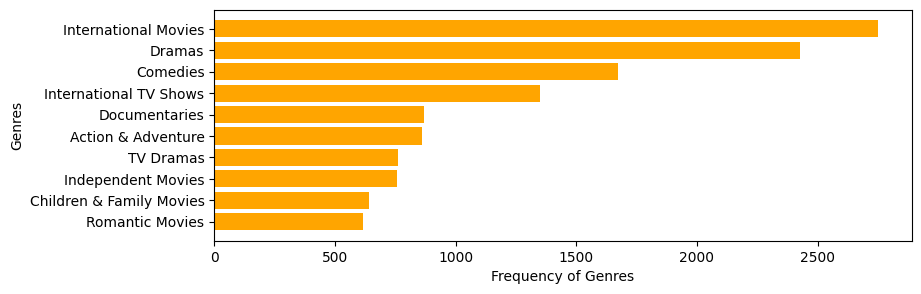

In [ ]:
df_genre=df1.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10).reset_index()

plt.figure(figsize=(9,3))
plt.barh(df_genre[::-1]['listed_in'],df_genre[::-1]['title'] ,color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas, Comedies are the widely added content's genres.

## Outliers in the duration of Movies and TV Shows

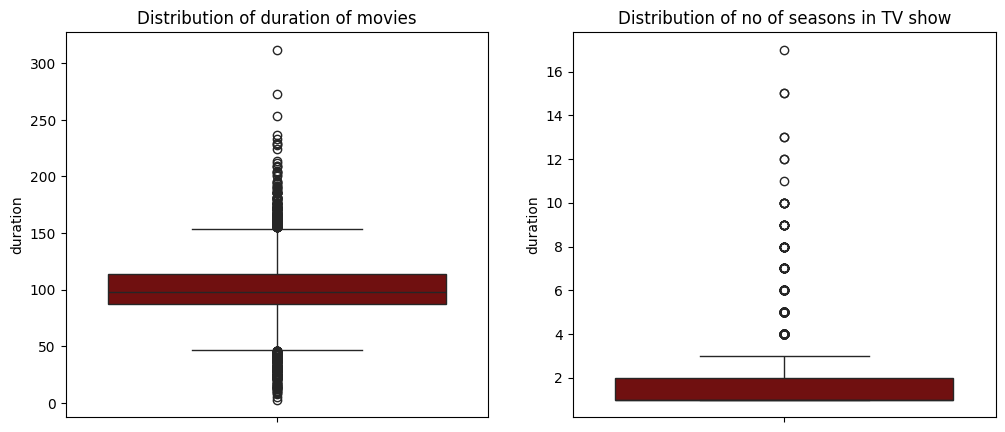

In [ ]:
plt.figure(figsize=(12,5))

duration_df = netflix_df.loc[netflix_df["duration"].str.contains("min")== True]["duration"].apply(lambda x: x.split()[0]).astype(int)
plt.subplot(1,2,1) #subplots to make the data look easy for comparison.
sns.boxplot(duration_df , color = "maroon")
plt.title("Distribution of duration of movies")

duration_season_df = netflix_df.loc[netflix_df["duration"].str.contains("Season")== True]["duration"].apply(lambda x: x.split()[0]).astype(int)
plt.subplot(1,2,2)
sns.boxplot(duration_season_df , color = "maroon")
plt.title("Distribution of no of seasons in TV show")

plt.show()

Conclusion -

* Average duration of movies are around 100 min
* Most of the TV shows are having 1 or 2 seasons.
* There are lot of outliers present in movies when compared to TV shows.

## Top 3 countries are USA, India, UK.

# Analysis for USA



In [ ]:
#Analyzing USA for both shows and movies
df_usa=df1[df1['country']=='United States']

df_usa.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United States,2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."


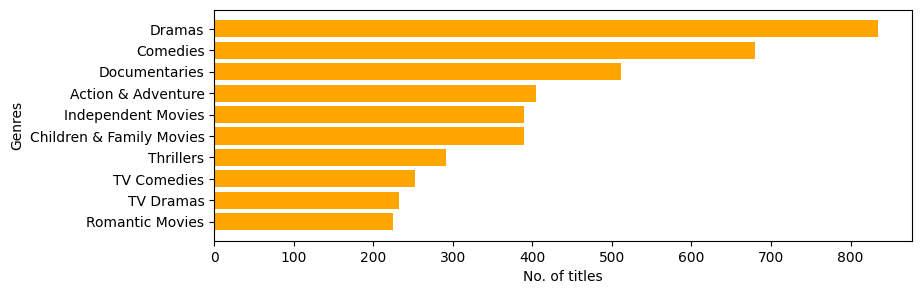

In [ ]:
df_genre=df_usa.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(9,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('No. of titles')
plt.ylabel('Genres')
plt.show()

For US it's Dramas, Comedies, Documentaries that are widely added genres.

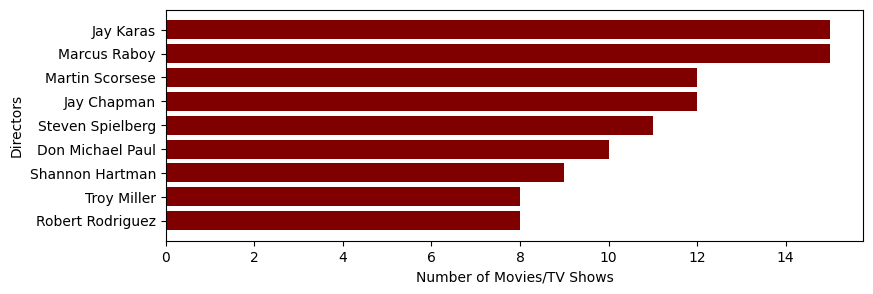

In [ ]:
df_directors=df_usa.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Not Available']
plt.figure(figsize=(9,3))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['maroon'])
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Directors')
plt.show()

Jay Karas, Marcus Raboy are top 2 directors in USA

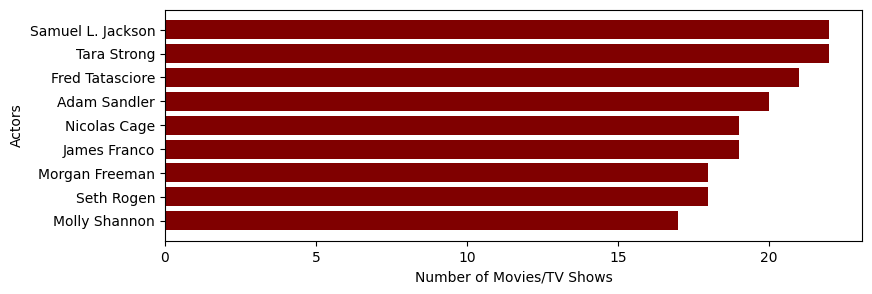

In [ ]:
df_actors=df_usa.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Not Available']
plt.figure(figsize=(9,3))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['maroon'])
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Actors')
plt.show()

<ipython-input-53-ad6d986d5043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['year_added'] = df_usa['date_added'].dt.year


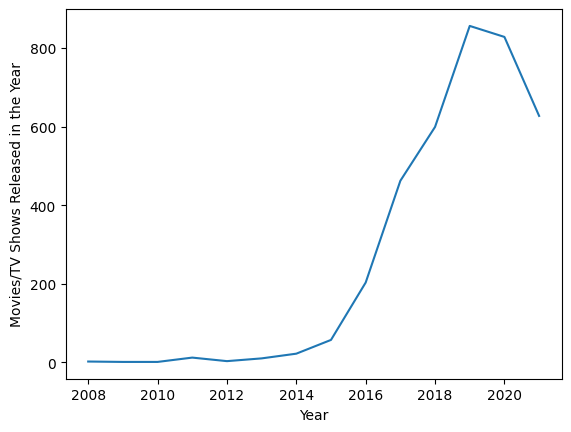

In [ ]:
df_usa['year_added'] = df_usa['date_added'].dt.year

df_year=df_usa.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel("Movies/TV Shows Released in the Year")
plt.xlabel("Year")
plt.show()

In USA there is a rise in the content added from 2014 to 2018 and we can observe that it's dropping till 2021

<ipython-input-54-471807193b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['month_added'] = df_usa['date_added'].dt.month


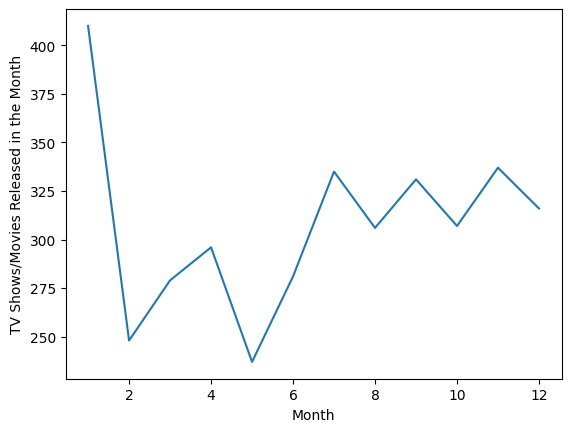

In [ ]:
df_usa['month_added'] = df_usa['date_added'].dt.month

df_month=df_usa.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows/Movies Released in the Month")
plt.xlabel("Month")
plt.show()

Most of the content is added in the first month and we can see that there is an increase in the months of July, September, November.

## **Analysis for India**

In [ ]:
df_india=df1[df1['country']=='India']

df_india.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,Not Available,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
4,s5,TV Show,Kota Factory,Not Available,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,Romantic TV Shows,In a city of coaching centers known to train I...
4,s5,TV Show,Kota Factory,Not Available,Mayur More,India,2021-09-24,2021,TV-MA,2 Seasons,TV Comedies,In a city of coaching centers known to train I...
4,s5,TV Show,Kota Factory,Not Available,Jitendra Kumar,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
4,s5,TV Show,Kota Factory,Not Available,Jitendra Kumar,India,2021-09-24,2021,TV-MA,2 Seasons,Romantic TV Shows,In a city of coaching centers known to train I...


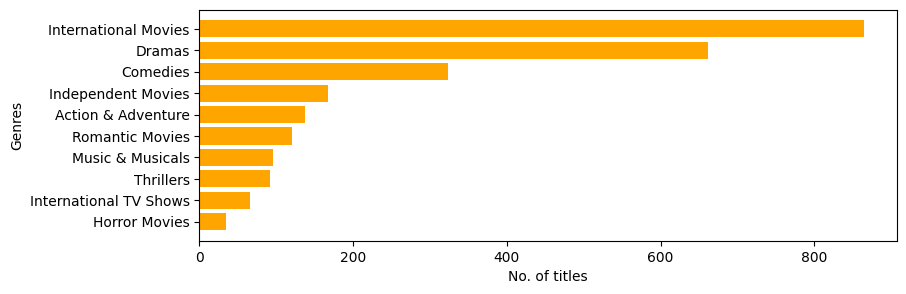

In [ ]:
df_genre=df_india.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(9,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('No. of titles')
plt.ylabel('Genres')
plt.show()

International movies, Dramas, Comedies are the widely added shown content in India

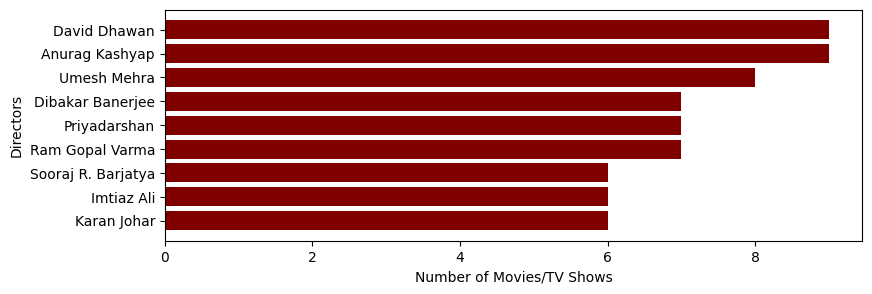

In [ ]:
df_directors=df_india.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Not Available']
plt.figure(figsize=(9,3))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['maroon'])
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Directors')
plt.show()

David Dhawan, Anurag Kashyap are the two popular Directors in India from Netflix data.

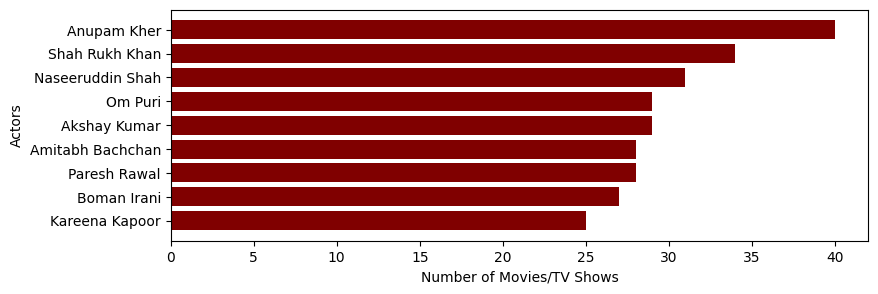

In [ ]:
df_actors=df_india.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Not Available']
plt.figure(figsize=(9,3))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['maroon'])
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Actors')
plt.show()

Anupam Kher, Shah Rukh Khan, Naseeruddin Shah are the 3 popular Actors in Netflix from India.

<ipython-input-59-4989919b68a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['year_added'] = df_india['date_added'].dt.year


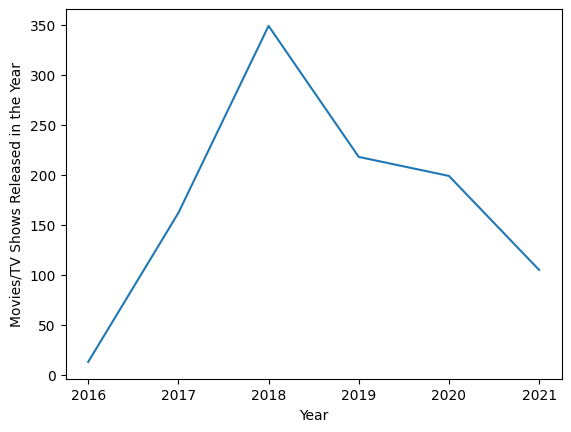

In [ ]:
df_india['year_added'] = df_india['date_added'].dt.year


df_year=df_india.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel("Movies/TV Shows Released in the Year")
plt.xlabel("Year")
plt.show()

A lot of content is added in the year 2018 from India and there is a downfall from then till 2021.

<ipython-input-60-d522f2dbee72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['month_added'] = df_india['date_added'].dt.month


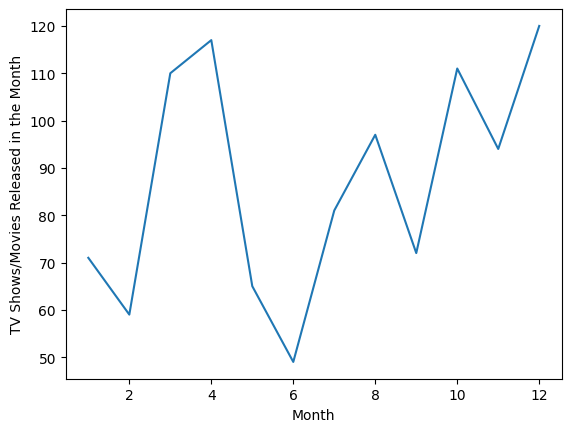

In [ ]:
df_india['month_added'] = df_india['date_added'].dt.month

df_month=df_india.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows/Movies Released in the Month")
plt.xlabel("Month")
plt.show()

In India, a lot of TV Shows and Movies are released in March, April, August, October, December.

# Analysis for UK

In [ ]:
#Analyzing USA for both shows and movies
df_uk=df1[df1['country']=='United Kingdom']

df_uk.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,2021-09-24,1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United Kingdom,2021-09-24,1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United Kingdom,2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United Kingdom,2021-09-24,1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."


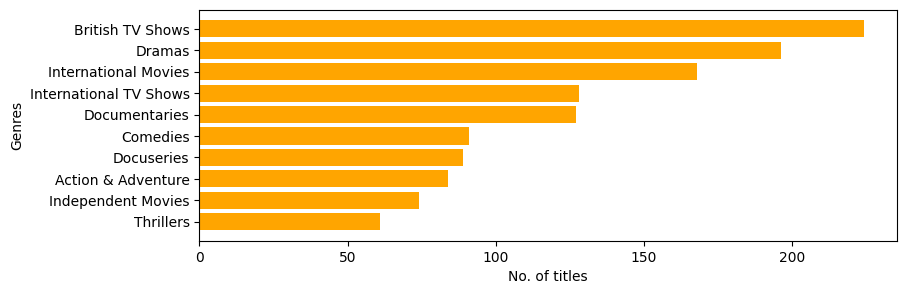

In [ ]:
df_genre=df_uk.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(9,3))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('No. of titles')
plt.ylabel('Genres')
plt.show()

British Shows, Dramas, International movies are the top 3 genres which are widely added in UK.

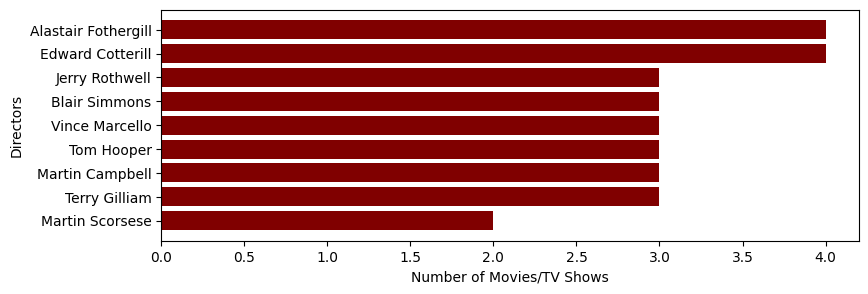

In [ ]:
df_directors=df_uk.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Not Available']
plt.figure(figsize=(9,3))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['maroon'])
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Directors')
plt.show()

Alastair Forthergill, Edward Cotterill, Jerry Rothwell are the top 3 directors in UK.

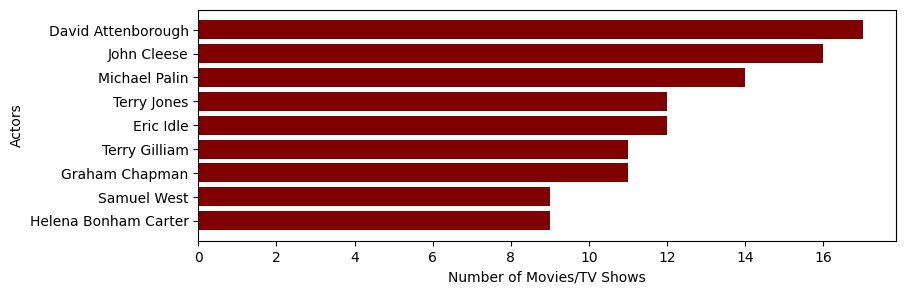

In [ ]:
df_actors=df_uk.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Not Available']
plt.figure(figsize=(9,3))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['maroon'])
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Actors')
plt.show()

David Attenborough, John Cleese, Michael Palin are the top 3 actors.

<ipython-input-73-89bee7ae7706>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['year_added'] = df_uk['date_added'].dt.year


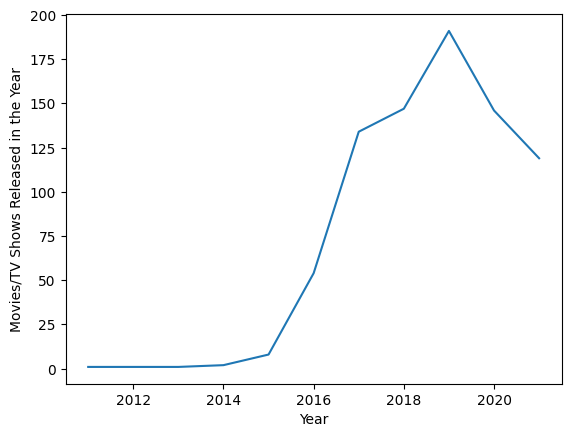

In [ ]:
df_uk['year_added'] = df_uk['date_added'].dt.year

df_year=df_uk.groupby(['year_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year_added', y='title')
plt.ylabel("Movies/TV Shows Released in the Year")
plt.xlabel("Year")
plt.show()

From 2015, there was a rise in the content added till 2019. Since 2019, there was a downfall in the number of movies/tv shows added.

<ipython-input-76-c02ab813f04e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['month_added'] = df_uk['date_added'].dt.month


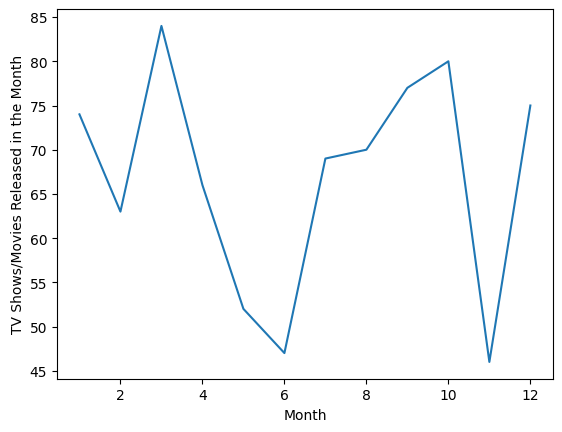

In [ ]:
df_uk['month_added'] = df_uk['date_added'].dt.month

df_month=df_uk.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows/Movies Released in the Month")
plt.xlabel("Month")
plt.show()

In UK, March,September,October,December has the highest amount of movies and tv shows released. We can see that there is good amount of spikes in the month of July.

Recommendations:

* Adding content before the holiday season is identified, we can continue to do that in months like March, April, July, September, November.
* Dramas are mostly enjoyed globally as per the data.
* When it comes to specific countries, Comedies and Documentaries can be focused in USA, International movies and Comedies in India and British TV Shows and International movies/TV Shows in the UK. Content aligning to these is recommended.
* India and UK can be focused more as they are in the top 3 that produces content.
* While creating content, take into consideration the popular actors/directors
for that country.
* Though TV-MA rated content tops the list on the whole, TV-PG,TV-14 rated content can be created for TV Shows and TV-14, R, TV-PG, PG-13 rated content for Movies as it may be a advantage in the increase of customers factor.
* There was a downfall in the movies added to Netflix from 2019 may be because of pandemic. But as per the past trends movies were added more than the tv shows so we can continue to add many movies based on the consumption rate.
* Duration of majority of the movies is between 85-115 mins and it's 1-2 seasons for TV Shows. So consider making more content in this range.
